In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import skimage

In [2]:
def plot_histogram(img_array, binz=10):
    plt.hist( img_array.flatten(), bins=binz)
    plt.title(f"bins={binz}")
    
def skplot_histogram(img_array):
    hist, _ = skimage.exposure.histogram(img_array)
    return hist

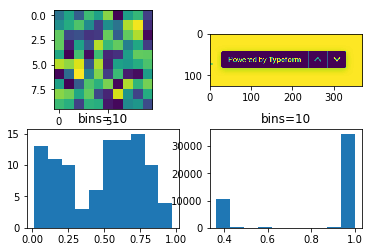

In [3]:
a = np.random.rand(10,10)
img = skimage.io.imread("typeform_nav.png", as_gray=True)
plt.subplot(2,2,1)
plt.imshow(a); 
plt.subplot(2,2,2)
plt.imshow(img);

plt.subplot(2,2,3)
plot_histogram( a );

plt.subplot(2,2,4)
plot_histogram( img )

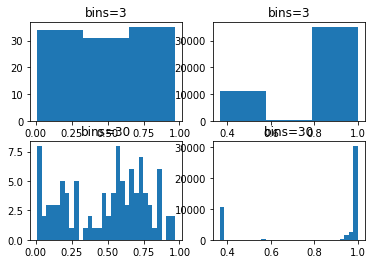

In [4]:
plt.subplot(2,2,1)
plot_histogram( a, binz=3 )
plt.subplot(2,2,2)
plot_histogram( img , binz=3)

plt.subplot(2,2,3)
plot_histogram( a , binz=30);

plt.subplot(2,2,4)
plot_histogram( img , binz=30)

In [5]:
# ## SKimage histogram 
# plt.subplot(1,2,1)
# plt.hist(skplot_histogram(a) )
# plt.subplot(1,2,2)
# plt.hist( skplot_histogram(img) )

In [6]:
import abc
class MyImage:
    def __init__(self, img_array):
        self.img_array = skimage.img_as_ubyte(img_array) ## save as int8
        
    def show(self, binz=8, cmapz=None):
        plt.subplot(1,2,1)
        plt.imshow( self.img_array , cmap=cmapz)
        plt.subplot(1,2,2)
        plt.hist(self.img_array.flatten(), bins=binz)
        plt.show();
        
    def stats(self):
        return f"Shape: {self.img_array.shape} \n\
                Mean: { np.mean( self.img_array )} \n\
                Median: {np.median( self.img_array )} \n\
                Max: {np.max( self.img_array )} \n\
                Min: {np.min( self.img_array )} "
        
class AFilter:
    @abc.abstractmethod
    def pad(img, kern):
        w, h = img.shape 
        kw, kh = kern.shape
        pw, ph = (kw - 1)//2, (kh-1)//2
        
        pot = np.zeros( (w+pw*2, h+ph*2) )
        pot[ pw:-pw, ph:-ph] = img 
        
        return pot
        
        
    @abc.abstractmethod
    def convolve(img, kern, padit=True):
        def get_kern(k):
            ## flip 180 
            flipped = np.flip(k, 1)
            return flipped
        def get_convolve_value(k, phood):
            ## sum of element-wise products
            return np.sum( k * phood) 
        
        flipped_kern = get_kern(kern)
        output = np.zeros(img.shape)
        in_img = AFilter.pad(img, kern) if padit else img.copy() 
        rowz, colz = in_img.shape 
        kw, kh = kern.shape
        
        ##TODO: fix padding/border-crossing
        for i in range(1, rowz+1):
            for j in range(1, colz+1):
                phood = in_img[ i:i+kw, j:j+kh ]
                output[ i, j] = get_convolve_value(flipped_kern, phood)
                
                if (j+kh)>= colz:
                    break
            if (i+kw) >= rowz:
                break
        return output

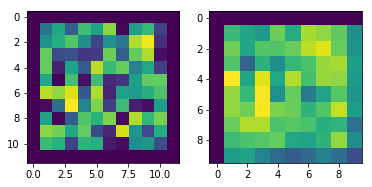

In [7]:
kern = np.random.rand(3, 3)
plt.subplot(1,2,1)
plt.imshow( AFilter.pad(a, kern)); 

plt.subplot(1,2,2)
plt.imshow(AFilter.convolve(a, kern));

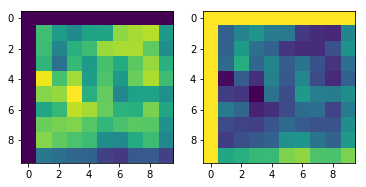

In [8]:
kern1 = np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,3)/45
plt.subplot(1,2,1)
plt.imshow(AFilter.convolve(a, 10*kern1));

plt.subplot(1,2,2)
plt.imshow(AFilter.convolve(a, -10*kern1));

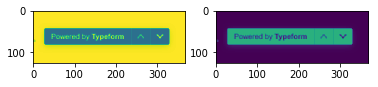

In [9]:
plt.subplot(1,2,1)
plt.imshow(AFilter.convolve(img, 100*kern));

plt.subplot(1,2,2)
plt.imshow(AFilter.convolve(img, -100*kern));

/home/moranis/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


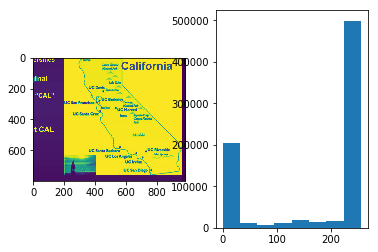

In [10]:
img2 = skimage.io.imread("img2.png", as_gray=True)
r, c = img2.shape 
img2 = img2[ c//7: -10, 2*r//3:-r//5 ]

my_img = MyImage(img2)

my_img.show();

In [11]:
my_img.stats()

'Shape: (796, 984) \n                Mean: 178.69342137516853 \n                Median: 251.0 \n                Max: 255 \n                Min: 0 '

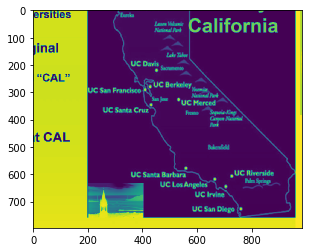

In [12]:
# 
plt.imshow(AFilter.convolve(img2, -10*kern));


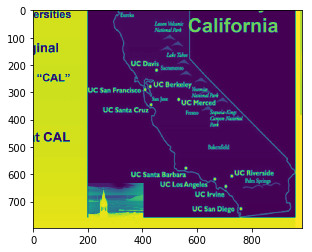

In [13]:
plt.imshow(AFilter.convolve(img2, -10*kern1));


In [14]:
kern3 =np.zeros( (3,3) )
np.fill_diagonal(kern3, 1)
kern3

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

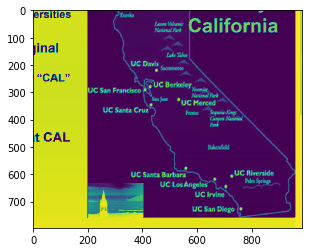

In [15]:
plt.imshow(AFilter.convolve(img2, -10*kern3));

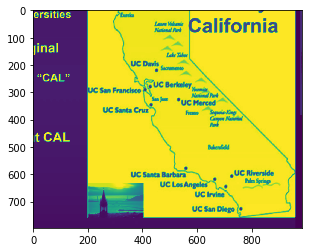

In [16]:

plt.imshow(AFilter.convolve(img2, 10*kern3));

In [17]:
kern4 = kern1.copy()
np.fill_diagonal(kern4, -1)
kern4

array([[-1.        ,  0.04444444,  0.06666667],
       [ 0.08888889, -1.        ,  0.13333333],
       [ 0.15555556,  0.17777778, -1.        ]])

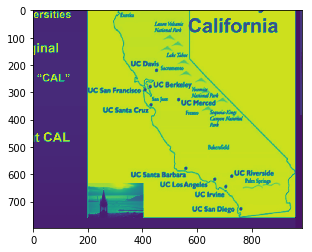

In [18]:
plt.imshow(AFilter.convolve(img2, -10*kern4) ); #, cmap='gray');

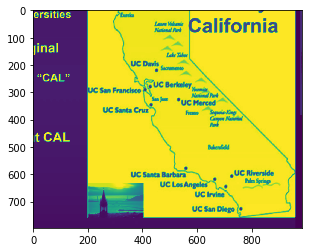

In [19]:
plt.imshow(AFilter.convolve(img2, 10*kern3) ); #, cmap='gray');

In [20]:
kern5 = kern4.copy().T
np.fill_diagonal(kern5, -1)
kern5

array([[-1.        ,  0.08888889,  0.15555556],
       [ 0.04444444, -1.        ,  0.17777778],
       [ 0.06666667,  0.13333333, -1.        ]])

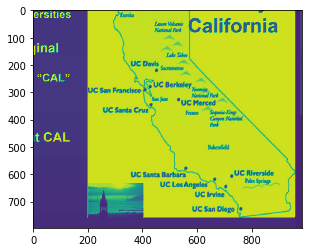

In [21]:
plt.imshow(AFilter.convolve(img2, -10*kern5));

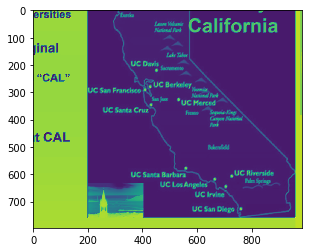

In [22]:
plt.imshow(AFilter.convolve(img2, 10*kern5));

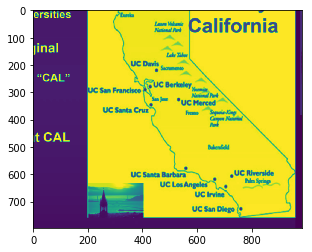

In [23]:
kern6 = np.array([
    [0.125, 0.25, 0.125 ],
    [0.25, 0, 0.25 ],
    [0.125, 0.25, 0.125 ],
])
plt.imshow(AFilter.convolve(img2, 10*kern6));

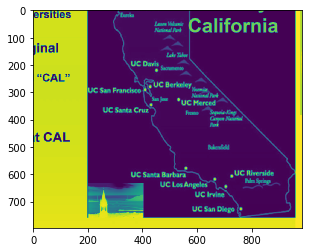

In [24]:

plt.imshow(AFilter.convolve(img2, -10*kern6));

 -----
something else

# Transformation - Kernel Types

https://en.wikipedia.org/wiki/Digital_image_processing#Digital_image_transformations



- Original 
- Spatial low pass
- Spatial high pass
- Fourier representation
- Fourier low pass
- Fourier high pass
- 

**Affine Transformations**
- Identity
- Reflection
- Scale
- Rotation
- Shear 

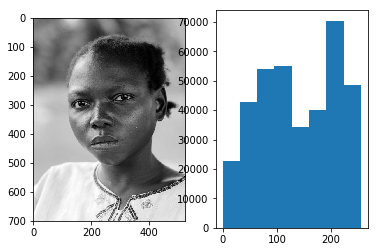

In [25]:
kimg = skimage.io.imread("media/img3.jpeg", as_gray=True)
k_img = MyImage(kimg) ##TODO: as type int8 
k_img.show(cmapz='gray')

In [26]:
k_img.stats()

'Shape: (700, 525) \n                Mean: 138.17074285714287 \n                Median: 134.0 \n                Max: 255 \n                Min: 0 '

In [27]:
def plot_pairs(img1, img2):
    plt.subplot(1,2,1)
    plt.imshow( img1 , cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(img2, cmap='gray');

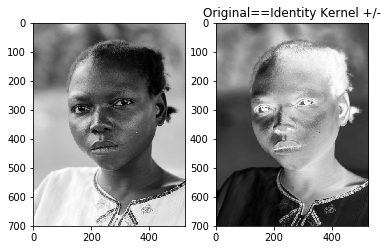

In [28]:
kern_origi = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0]
])
 
plot_pairs(AFilter.convolve(k_img.img_array, kern_origi), 
           AFilter.convolve(k_img.img_array, -1*kern_origi))

plt.title("Original==Identity Kernel +/-");

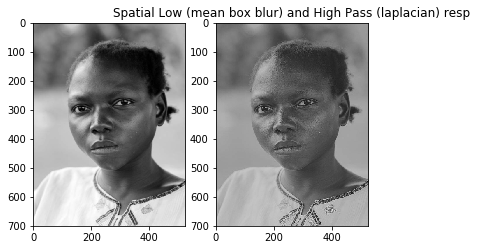

In [36]:
kern_spatial_low = np.ones((3,3))*(1/2) #== Box blur 
kern_spatial_high = np.array([
    [0,-1,0],
    [-1,8,-1],
    [0,-1,0]
])

plot_pairs(AFilter.convolve(k_img.img_array, kern_spatial_low), 
           AFilter.convolve(k_img.img_array, kern_spatial_high))

plt.title("Spatial Low (mean box blur) and High Pass (laplacian) resp");

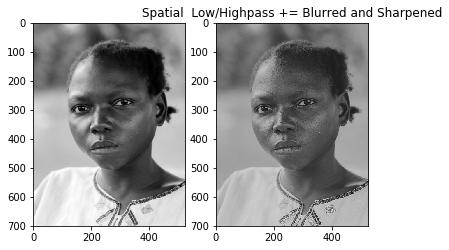

In [37]:
plot_pairs( 
  k_img.img_array+AFilter.convolve(k_img.img_array, kern_spatial_low), 
  k_img.img_array+AFilter.convolve(k_img.img_array, kern_spatial_high))

plt.title("Spatial  Low/Highpass += Blurred and Sharpened");

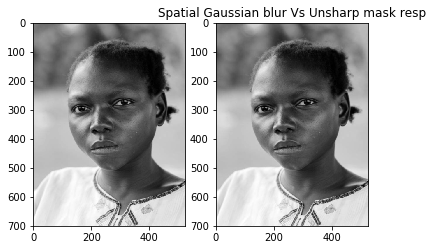

In [41]:
## Gaussian blyr Vs unsharp mask 
kern_gaussian_blur = np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
])*(1/16)

kern_unsharp_mask = np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
])

plot_pairs(AFilter.convolve(k_img.img_array, kern_gaussian_blur), 
           AFilter.convolve(k_img.img_array, kern_unsharp_mask))

plt.title("Spatial Gaussian blur Vs Unsharp mask resp");

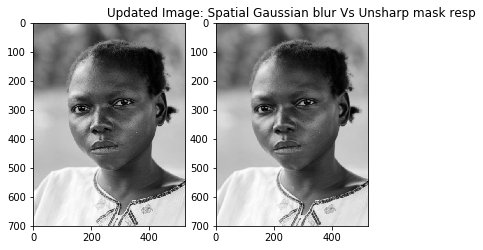

In [42]:
plot_pairs(k_img.img_array+AFilter.convolve(k_img.img_array, kern_gaussian_blur), 
           k_img.img_array+AFilter.convolve(k_img.img_array, kern_unsharp_mask))

plt.title("Updated Image: Spatial Gaussian blur Vs Unsharp mask resp");

## Afflines << TBD

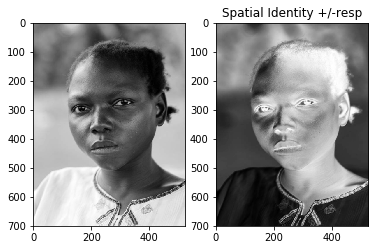

In [32]:
### Afflines next 
kern_identity = np.zeros((3,3), int)
np.fill_diagonal(kern_identity, 1)


plot_pairs(AFilter.convolve(k_img.img_array, kern_identity), 
           AFilter.convolve(k_img.img_array, -1*kern_identity))

plt.title("Spatial Identity +/-resp");

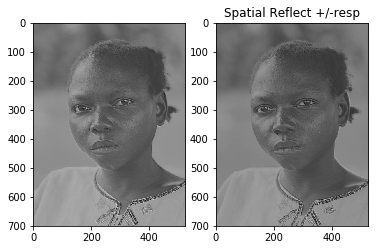

In [33]:
kern_reflect = np.array([
    [-1,0,0],
    [0,1,0],
    [0,0,1]
])

kern_reflect2 = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,-1]
])


plot_pairs(AFilter.convolve(k_img.img_array, kern_reflect), 
           AFilter.convolve(k_img.img_array, kern_reflect2))

plt.title("Spatial Reflect +/-resp");

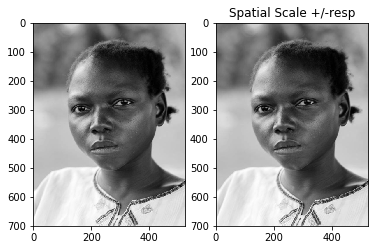

In [34]:
kern_scale = np.array([
    [2,0,0],
    [0,1,0],
    [0,0,1]
])

kern_scale2 = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,2]
])


plot_pairs(AFilter.convolve(k_img.img_array, kern_scale), 
           AFilter.convolve(k_img.img_array, kern_scale2))

plt.title("Spatial Scale +/-resp");

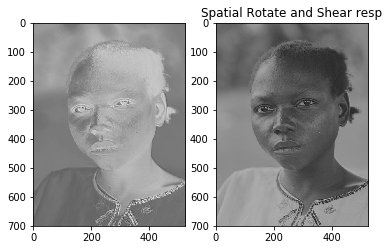

In [35]:
theta = 3
kern_rotate = np.array([
    [np.cos(theta), np.sin(theta),0],
    [ -1*np.sin(theta), np.cos(theta),0],
    [0,0,1]
])

kern_shear = np.array([
    [1,0.5,0],
    [0,1,0],
    [0,0,-1]
])


plot_pairs(AFilter.convolve(k_img.img_array, kern_rotate), 
           AFilter.convolve(k_img.img_array, kern_shear))

plt.title("Spatial Rotate and Shear resp");